In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
orders = pd.read_csv(
    "/content/olist_orders_dataset.csv",
    parse_dates=["order_purchase_timestamp"]
)

customers = pd.read_csv("/content/olist_customers_dataset.csv")
payments = pd.read_csv("/content/olist_order_payments_dataset.csv")


In [3]:
orders_delivered = orders[orders["order_status"] == "delivered"]

orders_delivered = orders_delivered.merge(
    customers[["customer_id", "customer_unique_id"]],
    on="customer_id"
)


In [4]:
customer_revenue = (
    orders_delivered
    .merge(payments, on="order_id")
    .groupby("customer_unique_id")["payment_value"]
    .sum()
)


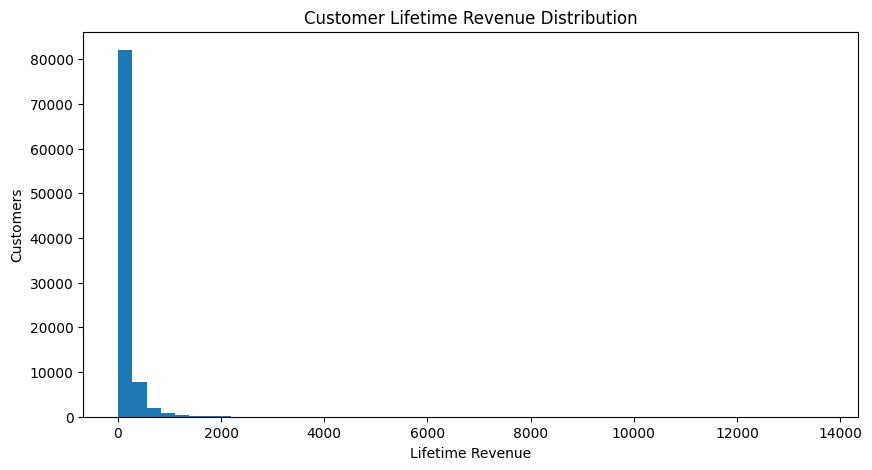

In [5]:
customer_revenue.plot(kind="hist", bins=50, figsize=(10,5))
plt.title("Customer Lifetime Revenue Distribution")
plt.xlabel("Lifetime Revenue")
plt.ylabel("Customers")
plt.show()


In [6]:
customer_revenue.describe()


,payment_value
count,93357.000000
mean,165.198772
std,226.314579
min,9.590000
25%,63.060000
50%,107.780000
75%,182.560000
max,13664.080000


Customer lifetime revenue is highly skewed, with a small fraction of customers contributing most revenue.
The median customer value is significantly lower than the mean.
Improving early retention would materially increase average LTV and reduce acquisition dependency.